# Housing Price Prediction

In [8575]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge,Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
import math
pd.options.display.max_columns = 1000

In [8576]:
data = pd.read_csv("train.csv")

In [8577]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [8578]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8579]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

<AxesSubplot:>

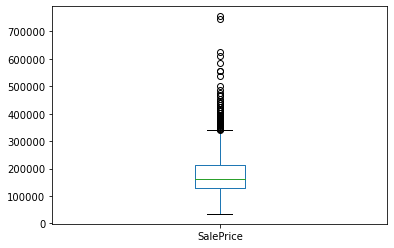

In [8580]:
data["SalePrice"].plot.box()

## Q-Q Plot Analysis for Distribution Check

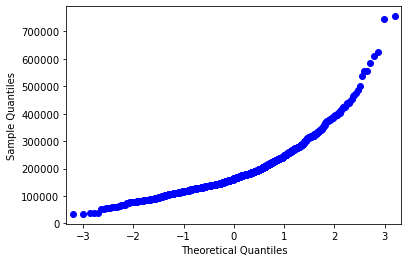

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8581]:
sm.qqplot(data['SalePrice'])
py.show()
data["SalePrice"].describe()

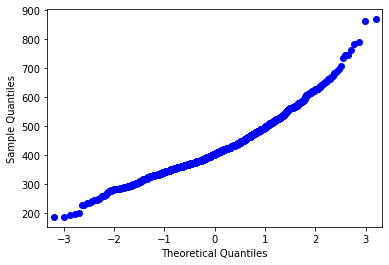

In [8582]:
sm.qqplot((data['SalePrice'])**0.5)
py.show()

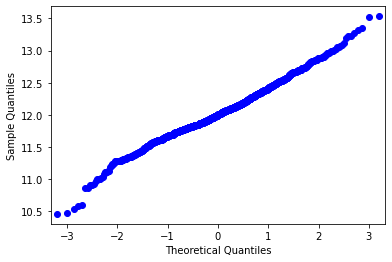

In [8583]:

sm.qqplot(np.log1p(data['SalePrice']))
py.show()

## Converting exponential distribution to Normal

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

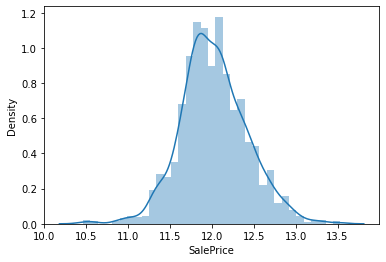

In [8584]:

sns.distplot(np.log1p(data['SalePrice']), kde=True)

In [8585]:
np.log1p(data['SalePrice']).describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [8586]:
data["SalePrice"] = np.log1p(data['SalePrice'])

<AxesSubplot:>

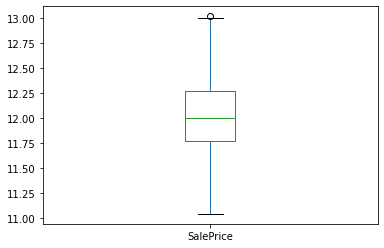

In [8587]:
def handle_outlier(data, col):
    col=str(col)
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    upper_range = Q3 + 1.5 * IQR
    lower_range = Q1 - 1.5 * IQR

    return data[(data[col]>lower_range) & (data[col]<upper_range)]

data = handle_outlier(data,"SalePrice")

data["SalePrice"].plot.box()

## Missing Value Treatement

In [8588]:
null_col_df = pd.DataFrame(data.isnull().any()).reset_index()

In [8589]:
null_col_df.columns = ["Col","Bool"]

In [8590]:
null_col_df = null_col_df[null_col_df["Bool"]==True]
null_col_df

Col  Bool
3    LotFrontage  True
6          Alley  True
25    MasVnrType  True
26    MasVnrArea  True
30      BsmtQual  True
31      BsmtCond  True
32  BsmtExposure  True
33  BsmtFinType1  True
35  BsmtFinType2  True
42    Electrical  True
57   FireplaceQu  True
58    GarageType  True
59   GarageYrBlt  True
60  GarageFinish  True
63    GarageQual  True
64    GarageCond  True
72        PoolQC  True
73         Fence  True
74   MiscFeature  True

In [8591]:
null_col_df["na_count"] = null_col_df["Col"].apply(lambda x: data[x].isna().sum())

In [8592]:
'''
Check data dictionary and replace categorical with none
and check numerical

'''
null_col_df


Col  Bool  na_count
3    LotFrontage  True       257
6          Alley  True      1344
25    MasVnrType  True         7
26    MasVnrArea  True         7
30      BsmtQual  True        35
31      BsmtCond  True        35
32  BsmtExposure  True        36
33  BsmtFinType1  True        35
35  BsmtFinType2  True        36
42    Electrical  True         1
57   FireplaceQu  True       676
58    GarageType  True        72
59   GarageYrBlt  True        72
60  GarageFinish  True        72
63    GarageQual  True        72
64    GarageCond  True        72
72        PoolQC  True      1426
73         Fence  True      1157
74   MiscFeature  True      1380

In [8593]:
# numeric: LotFrontage, 

# Categorical: Alley,BsmtQual, BsmtCond,BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, 
#GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature

# Remove Missing: MasVnrType,MasVnrArea, Electrical, GarageYrBlt

In [8594]:
data["BsmtCond"].value_counts()

TA    1292
Gd      64
Fa      40
Po       1
Name: BsmtCond, dtype: int64

In [8595]:
data[["Alley","BsmtQual"," BsmtCond","BsmtExposure"," BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]]=data[["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]].fillna(value="None")

In [8596]:
data = data[data['MasVnrType'].notna()]
data = data[data['MasVnrArea'].notna()]
data = data[data['Electrical'].notna()]
data = data[data['GarageYrBlt'].notna()]

In [8597]:
data["LotFrontage"].isna().sum()

249

In [8598]:
data[["BsmtCond","BsmtFinType1"]] = data[["BsmtCond","BsmtFinType1"]].fillna(value="None")

In [8599]:
data["LotFrontage"].describe()
## Mean and median are very close, fill missing with mean

count    1103.000000
mean       70.463282
std        24.114749
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

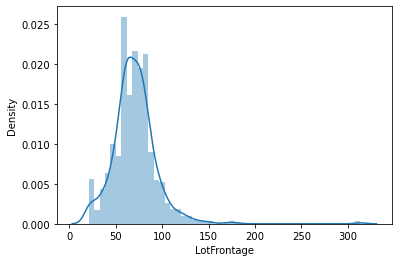

In [8600]:
sns.distplot(data["LotFrontage"], kde=True)

In [8601]:
mean_value = data["LotFrontage"].mean()
data["LotFrontage"].fillna(value=mean_value, inplace=True)

## Columns Analysis

In [8602]:
categorical_cols = data.describe(exclude = ['int', 'float']).columns

In [8603]:
data.describe(exclude = ['int', 'float'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1352   1352  1352     1352        1352      1352      1352   
unique        5      2     3        4           4         2         5   
top          RL   Pave  None      Reg         Lvl    AllPub    Inside   
freq       1081   1348  1273      844        1220      1351       968   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1352         1352       1352       1352     1352       1352   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1281          219       1170       1338     1140        672   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1352     1352        1352        1352       1352      1352   
unique         6        8          14          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1056     1329         486         475        780       827   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1352       1352     1352     1352         1352         1352   
unique         4          6        5        5            5            7   
top           TA      PConc       Gd       TA           No          GLQ   
freq        1199        613      593     1224          882          395   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1352    1352      1352       1352       1352        1352   
unique            7       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1160    1326       701       1288       1251         671   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1352        1352       1352         1352       1352       1352   
unique          7           6          6            3          5          5   
top           Typ        None     Attchd          Unf         TA         TA   
freq         1263         607        855          598       1285       1301   

       PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  BsmtCond  \
count        1352   1352  1352        1352     1352          1352      1352   
unique          3      4     5           5        9             6         5   
top             Y   None  None        None       WD        Normal        TA   
freq         1269   1346  1090        1302     1176          1123      1224   

        BsmtFinType1  
count           1352  
unique             7  
top              GLQ  
freq             395

In [8604]:
data.describe(exclude = ['object'])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1352.000000  1352.000000  1352.000000    1352.000000  1352.000000   
mean    729.923077    56.235207    70.463282   10606.051036     6.164941   
std     421.512244    41.246198    21.779398   10191.365257     1.301999   
min       1.000000    20.000000    21.000000    1300.000000     3.000000   
25%     363.750000    20.000000    60.000000    7680.000000     5.000000   
50%     729.500000    50.000000    70.463282    9587.500000     6.000000   
75%    1093.250000    70.000000    79.000000   11665.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1352.000000  1352.000000   1352.000000  1352.000000  1352.000000   
mean      5.591716  1972.761834   1985.319527   105.309911   449.698225   
std       1.075474    29.222687     20.389108   175.653634   450.208354   
min       2.000000  1880.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1955.000000   1968.000000     0.000000     0.000000   
50%       5.000000  1975.000000   1994.000000     0.000000   400.000000   
75%       6.000000  2001.000000   2004.000000   170.000000   721.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1352.000000  1352.000000  1352.000000  1352.000000  1352.000000   
mean     48.664201   567.443047  1065.805473  1169.576923   348.551036   
std     165.284694   441.153095   423.250593   375.147730   431.454533   
min       0.000000     0.000000     0.000000   483.000000     0.000000   
25%       0.000000   223.750000   808.000000   894.000000     0.000000   
50%       0.000000   474.000000  1004.500000  1096.500000     0.000000   
75%       0.000000   808.500000  1306.000000  1392.500000   729.250000   
max    1474.000000  2336.000000  6110.000000  4692.000000  1818.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1352.000000  1352.000000   1352.000000   1352.000000  1352.000000   
mean       3.794379  1521.922337      0.428254      0.059172     1.571746   
std       37.463457   493.375220      0.514081      0.239148     0.538001   
min        0.000000   520.000000      0.000000      0.000000     0.000000   
25%        0.000000  1151.500000      0.000000      0.000000     1.000000   
50%        0.000000  1478.000000      0.000000      0.000000     2.000000   
75%        0.000000  1779.000000      1.000000      0.000000     2.000000   
max      528.000000  5642.000000      2.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1352.000000   1352.000000   1352.000000   1352.000000  1352.000000   
mean      0.392012      2.866124      1.038462      6.525888     0.636095   
std       0.501835      0.776586      0.196189      1.546011     0.639762   
min       0.000000      0.000000      1.000000      3.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      6.000000      3.000000     12.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1352.000000  1352.000000  1352.000000  1352.000000  1352.000000   
mean   1978.296598     1.862426   498.243343    97.372781    46.730769   
std      24.604045     0.624216   183.424616   126.248788    64.926070   
min    1900.000000     1.000000   160.000000     0.000000     0.000000   
25%    1961.000000     1.000000   378.500000     0.000000     0.000000   
50%    1979.000000     2.000000   484.000000     0.000000    27.000000   
75%    2002.000000     2.000000   576.250000   171.000000    68.000000   
max    2

In [8605]:
numerical_cols = data.describe(exclude = ['object']).columns

In [8606]:
data.corr()["SalePrice"]

Id              -0.035492
MSSubClass      -0.075819
LotFrontage      0.315248
LotArea          0.236366
OverallQual      0.801227
OverallCond     -0.088019
YearBuilt        0.582971
YearRemodAdd     0.568497
MasVnrArea       0.391682
BsmtFinSF1       0.334151
BsmtFinSF2      -0.014163
BsmtUnfSF        0.221076
TotalBsmtSF      0.580330
1stFlrSF         0.562377
2ndFlrSF         0.293215
LowQualFinSF    -0.054747
GrLivArea        0.679872
BsmtFullBath     0.240831
BsmtHalfBath    -0.028749
FullBath         0.578356
HalfBath         0.284927
BedroomAbvGr     0.184690
KitchenAbvGr    -0.165901
TotRmsAbvGrd     0.504826
Fireplaces       0.461151
GarageYrBlt      0.535817
GarageCars       0.642864
GarageArea       0.598359
WoodDeckSF       0.321303
OpenPorchSF      0.350379
EnclosedPorch   -0.135975
3SsnPorch        0.055722
ScreenPorch      0.085274
PoolArea         0.038350
MiscVal         -0.011675
MoSold           0.073083
YrSold          -0.029794
SalePrice        1.000000
Name: SalePr

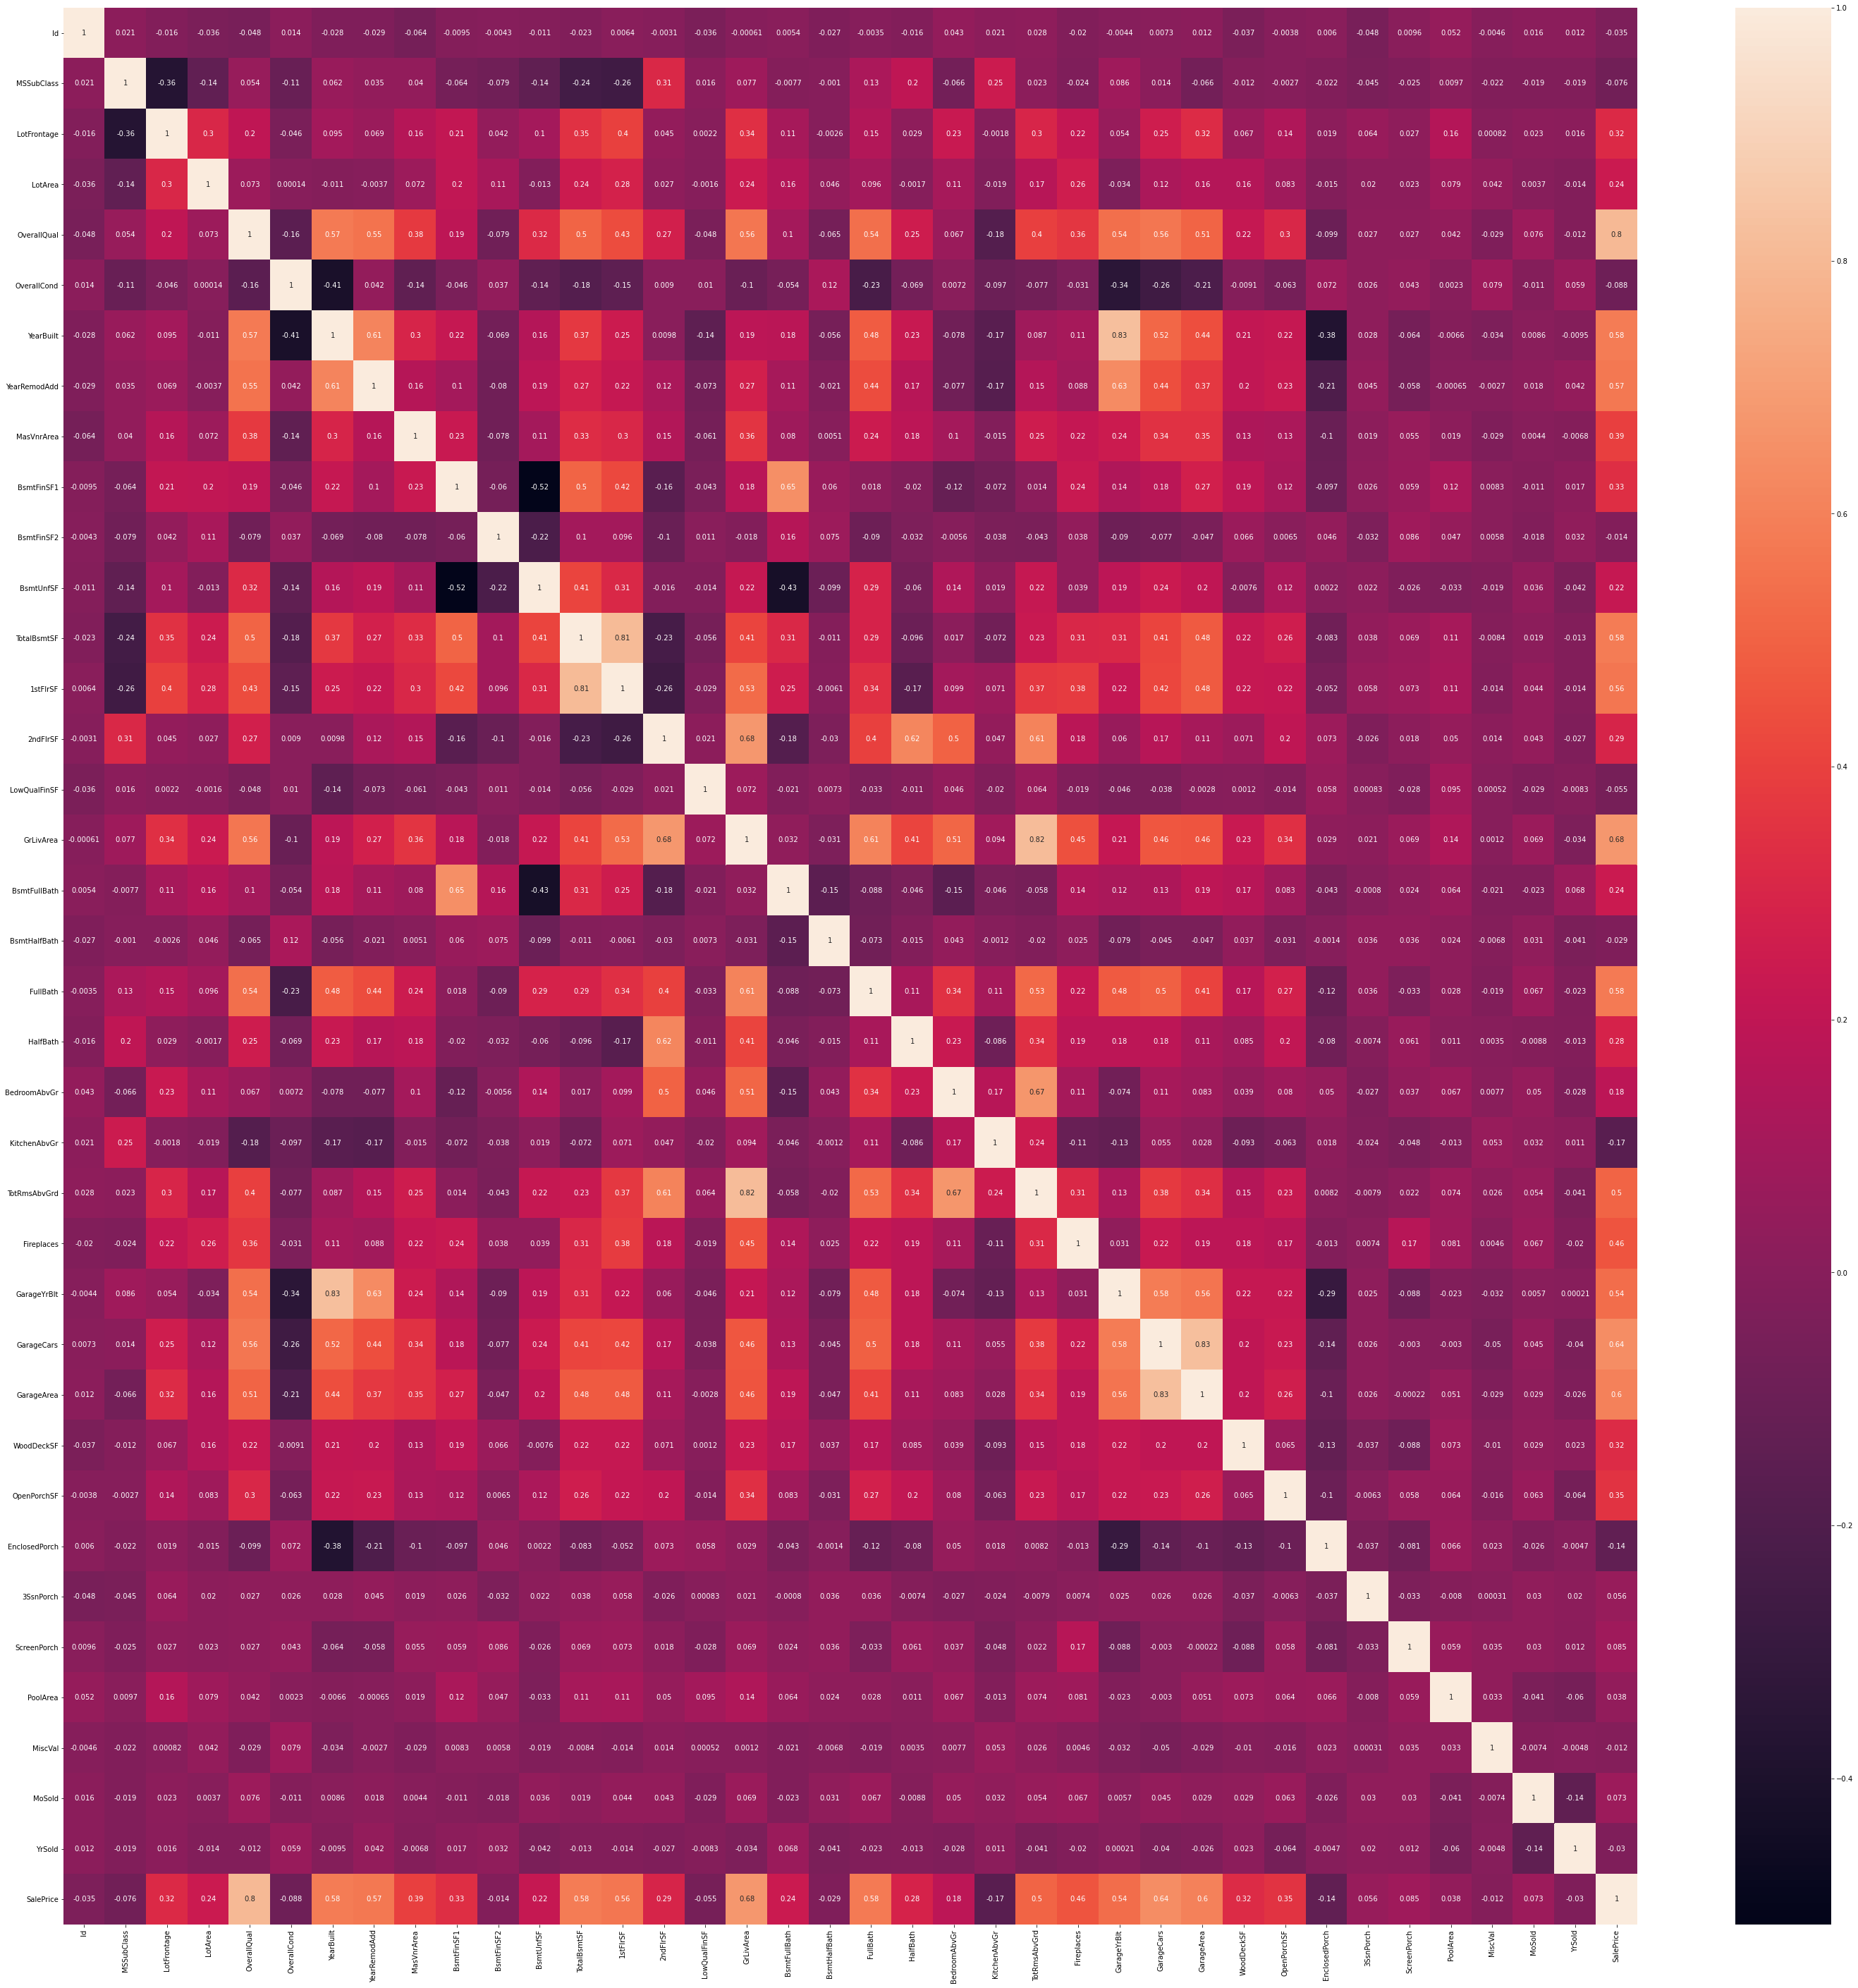

In [8607]:
plt.figure(figsize = (50, 50))
sns.heatmap(data[numerical_cols].corr(), annot = True)
plt.show()


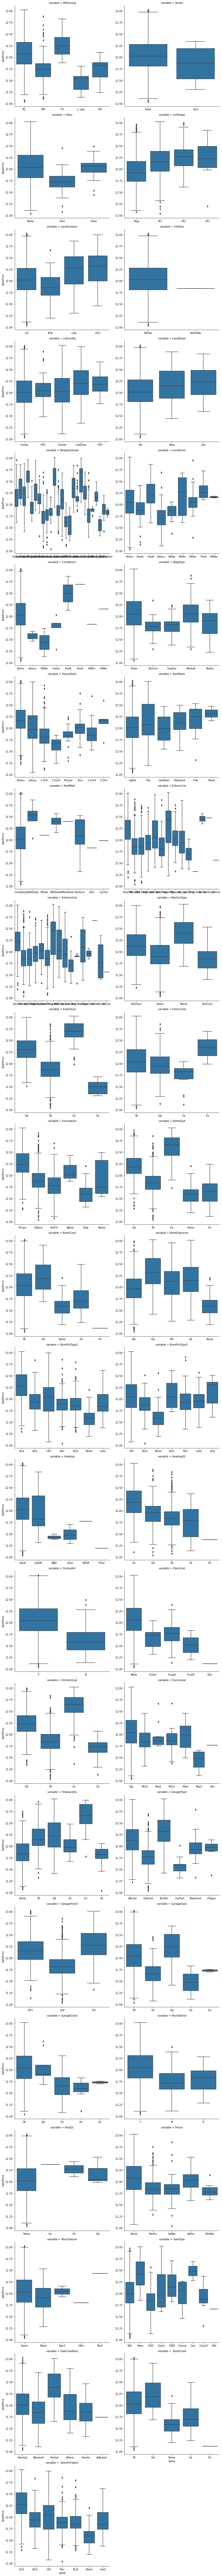

In [8608]:
data_ctg = pd.melt(data, id_vars = 'SalePrice', value_vars = categorical_cols)
graph = sns.FacetGrid(data_ctg, col='variable',  col_wrap=2, sharex=False, sharey=False, size=6, palette='Set1')
graph = graph.map(sns.boxplot, 'value', 'SalePrice')


In [8609]:
## Remove high correlated Data and all same columns

colums_to_drop=["Id", "GarageYrBlt", "GarageArea", "1stFlrSF", "TotRmsAbvGrd","Utilities"] 

data.drop(colums_to_drop, axis = 1, inplace=True)

In [8610]:
numerical_cols = data.describe(exclude = ['object']).columns
numerical_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

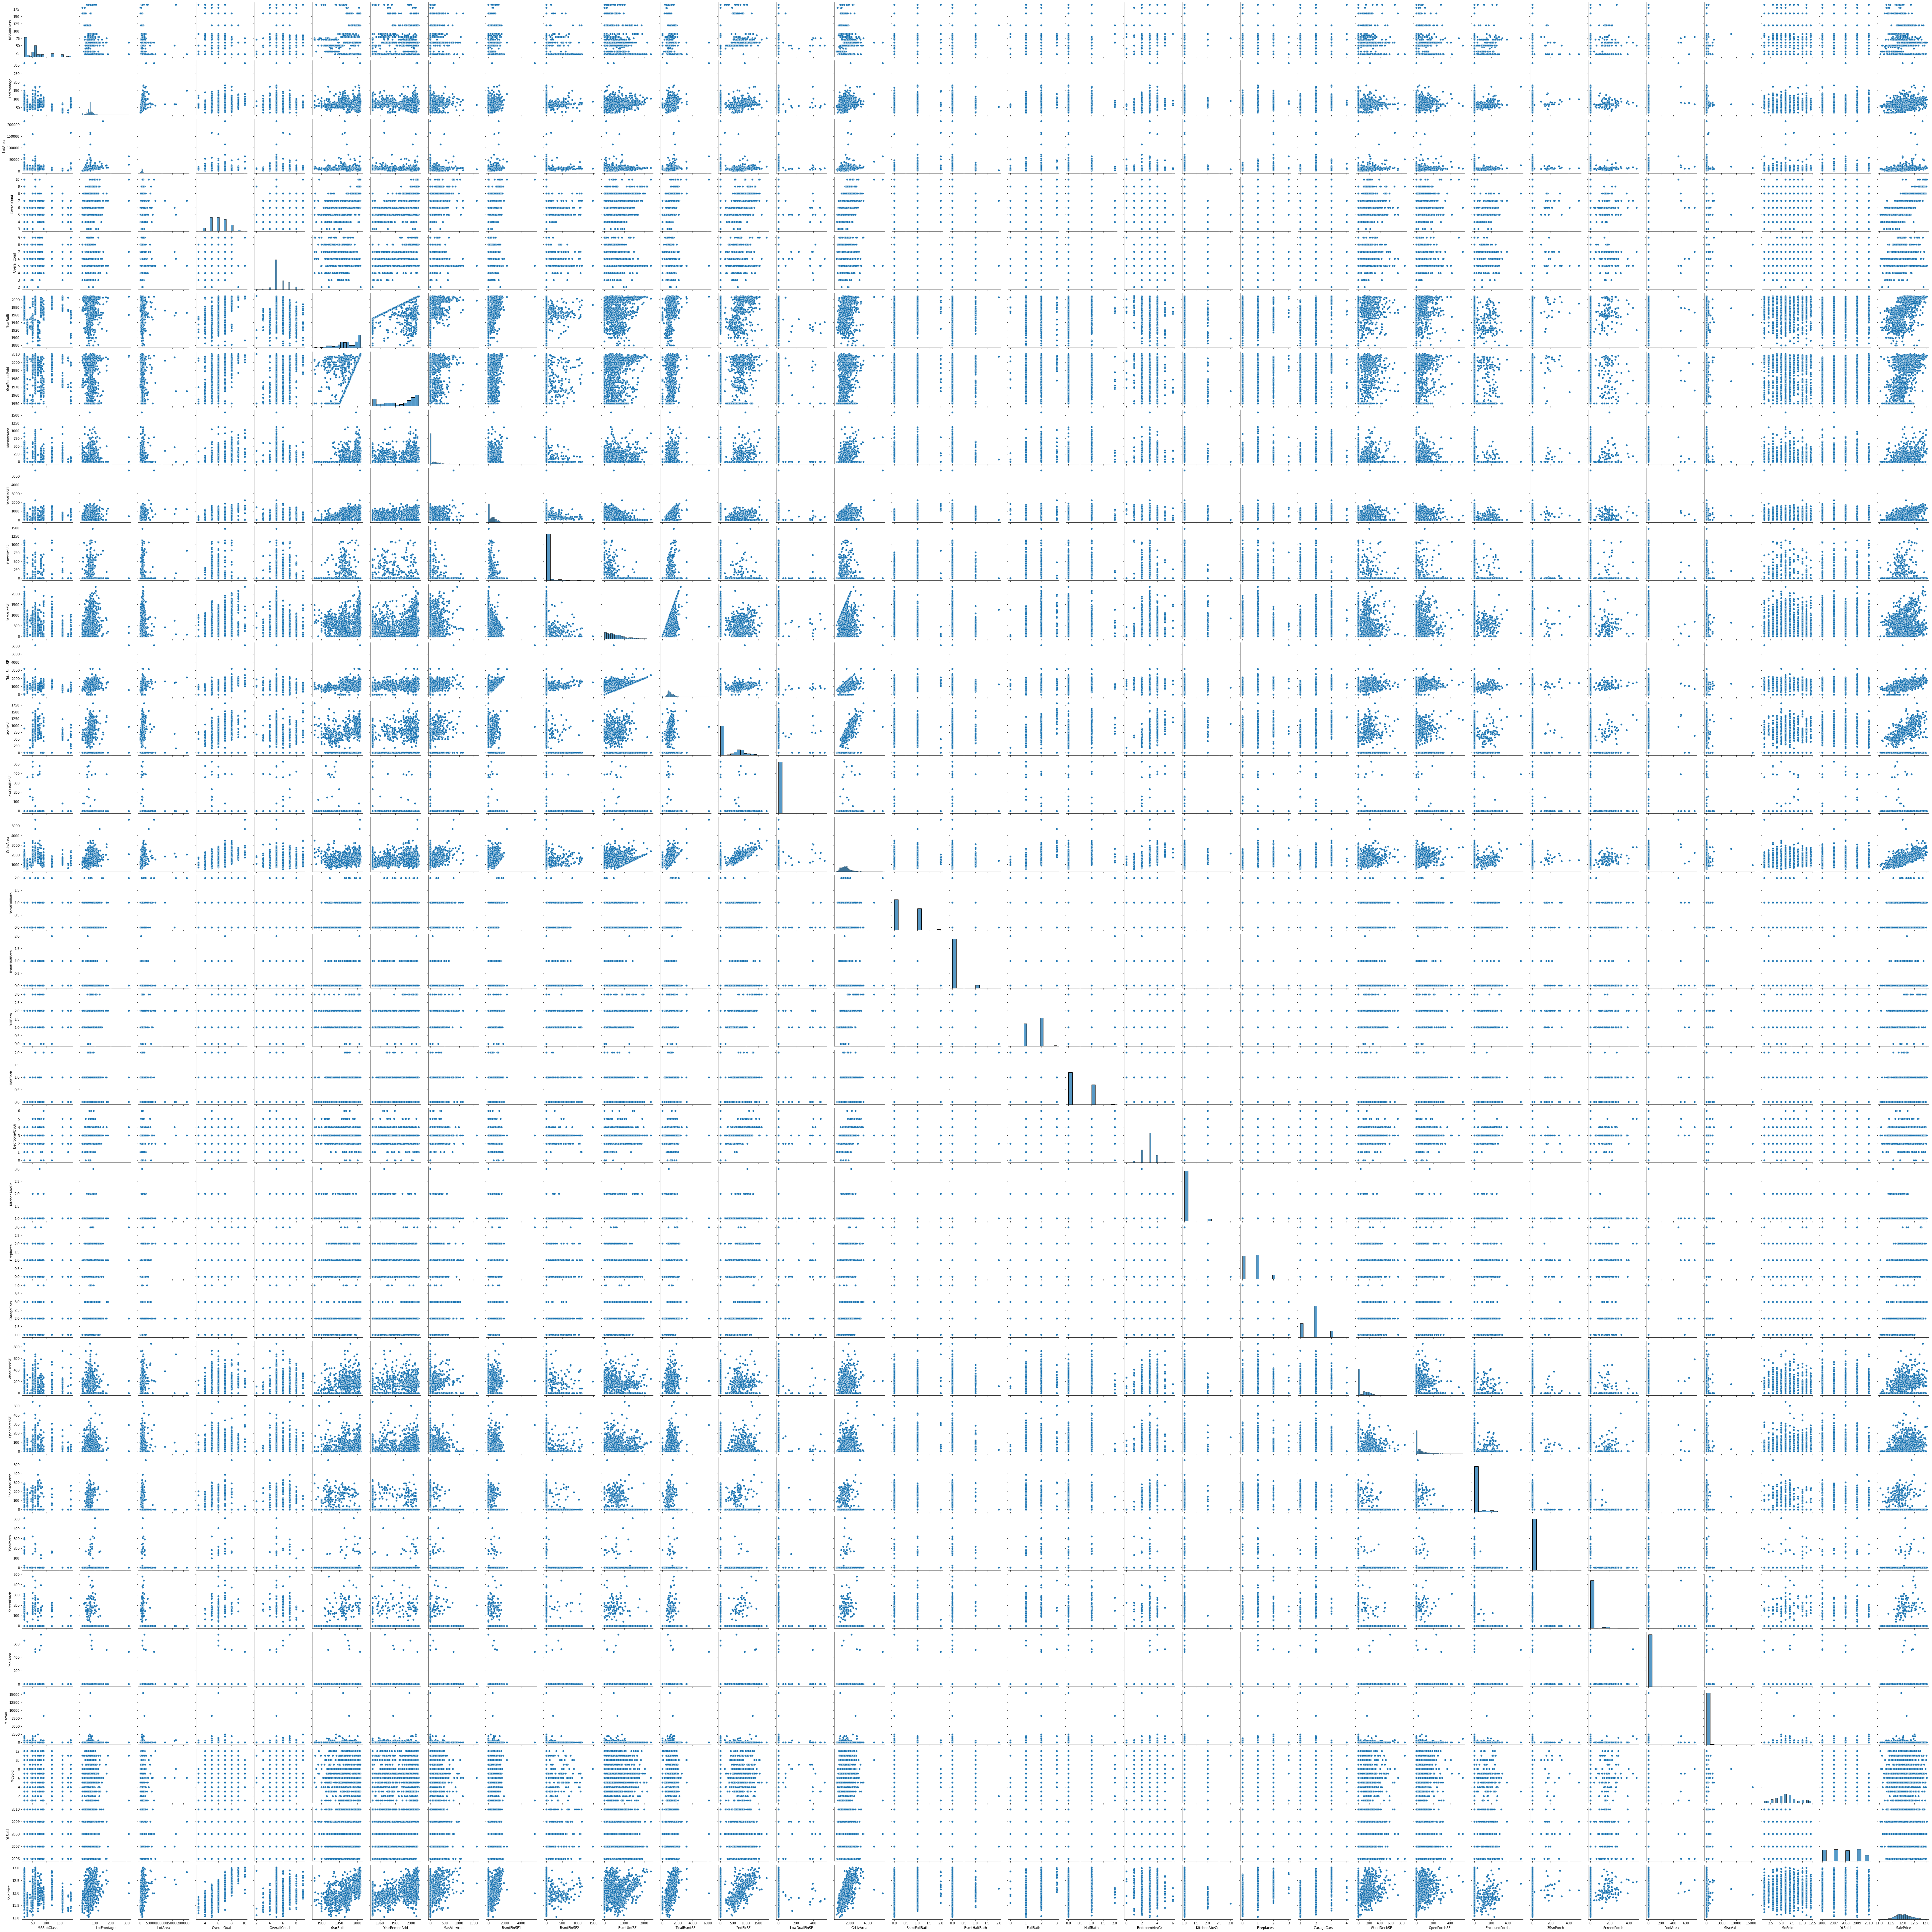

In [8611]:
sns.pairplot(data[numerical_cols])

In [8612]:
data["remodel"] = data["YearRemodAdd"]-data["YearBuilt"]
data["remodel"] = data["remodel"].apply(lambda x: "yes" if x>0 else "No")

In [8613]:
#data.drop(['PoolQC','Neighborhood','LotShape','GrLivArea','SaleCondition'], inplace=True, axis=1)

### Feature Types

In [8614]:

numerical_cols = data.describe(exclude = ['object']).columns

In [8615]:
numerical_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [8616]:

categorical_cols = data.describe(exclude = ['int', 'float']).columns

### Dummy Encoding for Categorical Features


In [8617]:
categorical_cols = data.describe(exclude = ['int', 'float']).columns
encoded = pd.get_dummies(data[categorical_cols], drop_first = True)
encoded

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0               0            0            1            0            1   
1               0            0            1            0            1   
2               0            0            1            0            1   
3               0            0            1            0            1   
4               0            0            1            0            1   
...           ...          ...          ...          ...          ...   
1455            0            0            1            0            1   
1456            0            0            1            0            1   
1457            0            0            1            0            1   
1458            0            0            1            0            1   
1459            0            0            1            0            1   

      Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0              1           0             0             0             1   
1              1           0             0             0             1   
2              1           0             0             0             0   
3              1           0             0             0             0   
4              1           0             0             0             0   
...          ...         ...           ...           ...           ...   
1455           1           0             0             0             1   
1456           1           0             0             0             1   
1457           1           0             0             0             1   
1458           1           0             0             0             1   
1459           1           0             0             0             1   

      LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0                   0                0                1                  0   
1                   0                0                1                  0   
2                   0                0                1                  0   
3                   0                0                1                  0   
4                   0                0                1                  0   
...               ...              ...              ...                ...   
1455                0                0                1                  0   
1456                0                0                1                  0   
1457                0                0                1                  0   
1458                0                0                1                  0   
1459                0                0                1                  0   

      LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
0                 0              0                 1              0   
1                 1              0                 0              0   
2                 0              0                 1              0   
3                 0              0                 0              0   
4                 1              0                 0              0   
...             ...            ...               ...            ...   
1455              0              0                 1              0   
1456              0              0                 1              0   
1457              0              0                 1              0   
1458              0              0                 1              0   
1459              0              0                 1              0   

      LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0                 0                     0                    0   
1                 0                     0                    0   
2                 0                     0                    0   
3                 0                     0                    0   
4                 0                     0                    0   
...             ...                   ...             

In [8618]:
data.drop(categorical_cols, axis = 1, inplace=True)

In [8619]:
data = pd.concat([data, encoded], axis = 1)

In [8620]:
data.describe(exclude = ['int', 'float'])

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
count  1352.000000  1352.000000  1352.000000  1352.000000  1352.000000   
mean      0.045858     0.008876     0.799556     0.142012     0.997041   
std       0.209254     0.093827     0.400481     0.349191     0.054332   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     1.000000     0.000000     1.000000   
50%       0.000000     0.000000     1.000000     0.000000     1.000000   
75%       0.000000     0.000000     1.000000     0.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        Alley_None   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
count  1352.000000  1352.000000   1352.000000   1352.000000   1352.000000   
mean      0.941568     0.027367      0.028846      0.007396      0.624260   
std       0.234645     0.163210      0.167436      0.085716      0.484493   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%       1.000000     0.000000      0.000000      0.000000      0.000000   
50%       1.000000     0.000000      0.000000      0.000000      1.000000   
75%       1.000000     0.000000      0.000000      0.000000      1.000000   
max       1.000000     1.000000      1.000000      1.000000      1.000000   

       LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
count      1352.000000      1352.000000      1352.000000        1352.000000   
mean          0.034763         0.024408         0.902367           0.065828   
std           0.183248         0.154370         0.296928           0.248074   
min           0.000000         0.000000         0.000000           0.000000   
25%           0.000000         0.000000         1.000000           0.000000   
50%           0.000000         0.000000         1.000000           0.000000   
75%           0.000000         0.000000         1.000000           0.000000   
max           1.000000         1.000000         1.000000           1.000000   

       LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
count    1352.000000    1352.000000       1352.000000    1352.000000   
mean        0.032544       0.002959          0.715976       0.043639   
std         0.177506       0.054332          0.451115       0.204366   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.000000       0.000000          0.000000       0.000000   
50%         0.000000       0.000000          1.000000       0.000000   
75%         0.000000       0.000000          1.000000       0.000000   
max         1.000000       1.000000          1.000000       1.000000   

       LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
count    1352.000000           1352.000000          1352.000000   
mean        0.008876              0.001479             0.011095   
std         0.093827              0.038447             0.104784   
min         0.000000              0.000000             0.000000   
25%         0.000000              0.000000             0.000000   
50%         0.000000              0.000000             0.000000   
75%         0.000000              0.000000             0.000000   
max         1.000000              1.000000             1.000000   

       Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
count           1352.000000            1352.00000           1352.000000   
mean               0.035503               0.01997              0.108728   
std                0.185116               0.13995              0.311413   
min                0.000000               0.00000              0.000000   
25%                0.000000               0.00000              0.000000   
50%                0.000000               0.00000              0.000000   
75%                0.000000               0.00000              0.000000   
max                1.000000               1.00000              1.000000   

     

## Train Test Split Model 1 (RFE)

In [8621]:
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [8622]:
scaler = StandardScaler()
# MinMaxScaler is not working here, error is too high

In [8623]:

data_train[numerical_cols] = scaler.fit_transform(data_train[numerical_cols])

In [8624]:
y_train = data_train.pop('SalePrice')
X_train = data_train

In [8625]:
data.shape

(1352, 260)

In [8626]:
data_test[numerical_cols] = scaler.transform(data_test[numerical_cols])
y_test = data_test.pop('SalePrice')
X_test = data_test

## RFE MODEL

In [8627]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

In [8628]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     69.41
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:39:06   Log-Likelihood:                 157.78
No. Observations:                 946   AIC:                             154.4
Df Residuals:                     711   BIC:                             1295.
Df Model:                         234                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -12.5592      0.910    -13.806      0.000     -14.345     -10.773
MSSubClass               -0.0191      0.043     -0.447      0.655      -0.103       0.065
LotFrontage               0.0184      0.013      1.393      0.164      -0.008       0.044
LotArea                   0.1065      0.015      7.041      0.000       0.077       0.136
OverallQual               0.1316      0.018      7.178      0.000       0.096       0.168
OverallCond               0.1244      0.013      9.579      0.000       0.099       0.150
YearBuilt                 0.1706      0.033      5.216      0.000       0.106       0.235
YearRemodAdd              0.0111      0.017      0.669      0.504      -0.022       0.044
MasVnrArea            -3.468e-05      0.013     -0.003      0.998      -0.026       0.026
BsmtFinSF1                0.0969      0.015      6.502      0.000       0.068       0.126
BsmtFinSF2                0.0323      0.016      1.964      0.050    1.43e-05       0.065
BsmtUnfSF                 0.0154      0.013      1.149      0.251      -0.011       0.042
TotalBsmtSF               0.1308      0.022      6.027      0.000       0.088       0.173
2ndFlrSF                  0.0218      0.044      0.490      0.624      -0.065       0.109
LowQualFinSF             -0.0136      0.013     -1.056      0.291      -0.039       0.012
GrLivArea                 0.3496      0.039      9.076      0.000       0.274       0.425
BsmtFullBath              0.0174      0.014      1.246      0.213      -0.010       0.045
BsmtHalfBath              0.0005      0.010      0.049      0.961      -0.019       0.020
FullBath                  0.0089      0.017      0.537      0.592      -0.024       0.042
HalfBath                  0.0018      0.015      0.121      0.904      -0.027       0.031
BedroomAbvGr             -0.0150      0.014     -1.063      0.288      -0.043       0.013
KitchenAbvGr             -0.0529      0.020     -2.696      0.007      -0.091      -0.014
Fireplaces                0.0097      0.021      0.462      0.644      -0.032       0.051
GarageCars                0.0831      0.013      6.172      0.000       0.057       0.110
WoodDeckSF                0.0302      0.010      2.971      0.003       0.010       0.050
OpenPorchSF               0.0152      0.010      1.461      0.144      -0.005       0.036
EnclosedPorch             0.0148      0.011      1.366      0.172      -0.006       0.036
3SsnPorch                 0.0045      0.009      0.510      0.610      -0.013       0.022
ScreenPorch               0.0302      0.009      3.186      0.002       0.012       0.049
PoolArea                  0.5625      0.041     13.624      0.000       0.481       0.644
MiscVal                   0.0410      0.033      1.254      0.210      -0.023       0.105
MoSold                 

In [8629]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
107    RoofMatl_CompShg  inf
111    RoofMatl_Tar&Grv  inf
158       BsmtQual_None  inf
225           PoolQC_Fa  inf
226           PoolQC_Gd  inf
..                  ...  ...
108    RoofMatl_Membran  NaN
116  Exterior1st_CBlock  NaN
130  Exterior2nd_CBlock  NaN
233    MiscFeature_Othr  NaN
242        SaleType_Oth  NaN

[260 rows x 2 columns]

In [8630]:
rfe_var_count = 30

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, rfe_var_count)             
rfe = rfe.fit(X_train_lm, y_train)

In [8631]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 230),
 ('LotFrontage', False, 182),
 ('LotArea', False, 195),
 ('OverallQual', False, 81),
 ('OverallCond', True, 1),
 ('YearBuilt', False, 69),
 ('YearRemodAdd', False, 58),
 ('MasVnrArea', False, 223),
 ('BsmtFinSF1', False, 228),
 ('BsmtFinSF2', False, 27),
 ('BsmtUnfSF', False, 36),
 ('TotalBsmtSF', False, 37),
 ('2ndFlrSF', False, 14),
 ('LowQualFinSF', False, 166),
 ('GrLivArea', False, 187),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 181),
 ('FullBath', False, 226),
 ('HalfBath', False, 204),
 ('BedroomAbvGr', False, 219),
 ('KitchenAbvGr', False, 192),
 ('Fireplaces', False, 149),
 ('GarageCars', False, 206),
 ('WoodDeckSF', False, 90),
 ('OpenPorchSF', False, 177),
 ('EnclosedPorch', False, 190),
 ('3SsnPorch', False, 191),
 ('ScreenPorch', False, 211),
 ('PoolArea', False, 175),
 ('MiscVal', True, 1),
 ('MoSold', False, 128),
 ('YrSold', False, 210),
 ('MSZoning_FV', False, 209),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', False, 4),
 ('MSZoni

In [8632]:
col = X_train_lm.columns[rfe.support_]
len(col)

30

In [8633]:
X_train_rfe = X_train_lm[col]

In [8634]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [8635]:
lm_rfe = sm.OLS(y_train,X_train_rfe).fit() 

In [8636]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
len(vif[vif["VIF"]>5].Features)

15

In [8637]:
lm_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     171.5
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:39:13   Log-Likelihood:                -491.30
No. Observations:                 946   AIC:                             1039.
Df Residuals:                     918   BIC:                             1174.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -10.6112      0.982    -10.810      0.000     -12.538      -8.685
OverallQual            0.5038      0.018     28.185      0.000       0.469       0.539
GrLivArea              0.4131      0.018     23.591      0.000       0.379       0.447
PoolArea               0.3076      0.043      7.118      0.000       0.223       0.392
MSZoning_FV            0.5234      0.075      6.959      0.000       0.376       0.671
MSZoning_RL            0.4459      0.042     10.692      0.000       0.364       0.528
Condition2_Norm        0.4560      0.147      3.092      0.002       0.167       0.745
Condition2_RRAe       -0.9984      0.651     -1.534      0.125      -2.276       0.279
BldgType_Twnhs        -0.4871      0.086     -5.658      0.000      -0.656      -0.318
RoofStyle_Shed         1.1401      0.477      2.389      0.017       0.204       2.077
RoofMatl_CompShg       3.5717      0.348     10.251      0.000       2.888       4.255
RoofMatl_Metal         4.0750      0.515      7.911      0.000       3.064       5.086
RoofMatl_Roll          2.9256      0.511      5.729      0.000       1.923       3.928
RoofMatl_Tar&Grv       3.8090      0.341     11.180      0.000       3.140       4.478
RoofMatl_WdShake       3.1258      0.408      7.667      0.000       2.326       3.926
RoofMatl_WdShngl       4.0036      0.409      9.784      0.000       3.201       4.807
Foundation_Wood       -0.4928      0.239     -2.061      0.040      -0.962      -0.023
BsmtCond_Gd            0.3802      0.108      3.507      0.000       0.167       0.593
BsmtFinType2_None      0.4625      0.414      1.118      0.264      -0.350       1.275
CentralAir_Y           0.3610      0.069      5.201      0.000       0.225       0.497
Electrical_FuseP      -0.6373      0.419     -1.519      0.129      -1.460       0.186
Electrical_Mix        -0.5549      0.212     -2.622      0.009      -0.970      -0.140
Functional_Sev        -1.8266      0.448     -4.076      0.000      -2.706      -0.947
GarageQual_Fa         -0.4165      0.083     -4.992      0.000      -0.580      -0.253
PoolQC_Fa              0.3899      0.293      1.332      0.183      -0.185       0.964
PoolQC_Gd             -0.1302      0.565     -0.230      0.818      -1.239       0.979
PoolQC_None            5.5501      0.644      8.622      0.000       4.287       6.813
MiscFeature_TenC       0.3899      0.293      1.332      0.183      -0.185       0.964
 BsmtCond_Po          -0.5549      0.212     -2.622      0.009      -0.970      -0.140
 BsmtCond_TA           0.3893      0.089      4.393      0.000       0.215       0.563
 BsmtFinType1_None    -0.5455      0.431     -1.266      0.206      -1.391       0.300
==============================================================================
Omnibus:                       18.251   Durbin

In [8638]:
X_train_rfe.drop(["PoolQC_Gd","RoofMatl_Tar&Grv","RoofMatl_WdShngl","Foundation_Wood","RoofStyle_Shed","Electrical_Mix","RoofMatl_Roll","PoolArea","RoofMatl_WdShake","RoofMatl_Metal","Electrical_FuseP","RoofMatl_CompShg","BsmtFinType2_None","PoolQC_None","Condition2_RRAe"," BsmtFinType1_None","PoolQC_Fa","MiscFeature_TenC"],axis=1,inplace=True)

col = X_train_rfe.columns

In [8639]:
lm_rfe = sm.OLS(y_train,X_train_rfe).fit() 

In [8640]:
lm_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     313.8
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          1.85e-317
Time:                        01:39:13   Log-Likelihood:                -577.63
No. Observations:                 946   AIC:                             1181.
Df Residuals:                     933   BIC:                             1244.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.4985      0.172     -8.693      0.000      -1.837      -1.160
OverallQual         0.5210      0.019     27.469      0.000       0.484       0.558
GrLivArea           0.3499      0.018     19.512      0.000       0.315       0.385
MSZoning_FV         0.5389      0.081      6.618      0.000       0.379       0.699
MSZoning_RL         0.4575      0.045     10.187      0.000       0.369       0.546
Condition2_Norm     0.3992      0.151      2.643      0.008       0.103       0.696
BldgType_Twnhs     -0.5074      0.093     -5.428      0.000      -0.691      -0.324
BsmtCond_Gd         0.4308      0.096      4.486      0.000       0.242       0.619
CentralAir_Y        0.3695      0.074      4.961      0.000       0.223       0.516
Functional_Sev     -1.4710      0.450     -3.267      0.001      -2.354      -0.587
GarageQual_Fa      -0.4019      0.090     -4.446      0.000      -0.579      -0.224
 BsmtCond_Po       -1.1144      0.455     -2.447      0.015      -2.008      -0.221
 BsmtCond_TA        0.4076      0.069      5.882      0.000       0.272       0.544
==============================================================================
Omnibus:                      387.751   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8196.502
Skew:                          -1.350   Prob(JB):                         0.00
Kurtosis:                      17.165   Cond. No.                         65.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8641]:
lm_rfe.summary()
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0             const  139.61
12      BsmtCond_TA    2.08
7       BsmtCond_Gd    2.00
1       OverallQual    1.69
2         GrLivArea    1.51
4       MSZoning_RL    1.50
3       MSZoning_FV    1.38
8      CentralAir_Y    1.16
6    BldgType_Twnhs    1.10
10    GarageQual_Fa    1.06
11      BsmtCond_Po    1.03
5   Condition2_Norm    1.01
9    Functional_Sev    1.01

## Residual Analysis

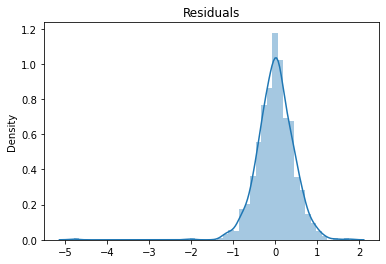

In [8642]:
y_train_pred = lm_rfe.predict(X_train_rfe)
res = y_train - y_train_pred
plt.figure()
sns.distplot(res)
plt.title("Residuals")
plt.show()

In [8643]:
#Due to existing constant variance feature sm fails to add const so added on our own
X_test_lm = X_test
X_test_lm["const"]=1
X_test_lm = X_test_lm[col]

In [8644]:
y_test_pred = lm_rfe.predict(X_test_lm) 

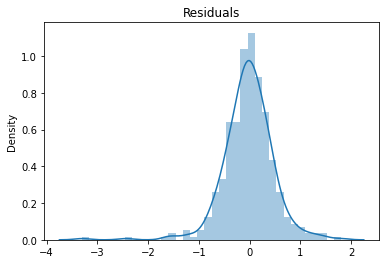

In [8645]:
res = y_test - y_test_pred
plt.figure()
plt.title("Residuals")
sns.distplot(res.to_frame())
plt.show()

In [8646]:
dist_check = pd.DataFrame(res)
dist_check["pred"] = y_test_pred
dist_check.columns=["err","pred"]

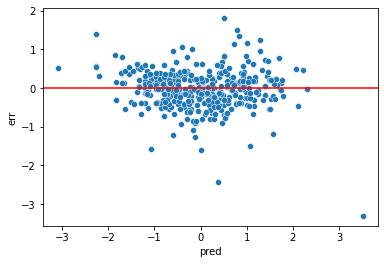

In [8647]:
sns.scatterplot(data=dist_check,x="pred",y="err")
plt.axhline(y=0.0, color='r', linestyle='-')

In [8648]:
r2_test= r2_score(y_true=y_test,y_pred=y_test_pred)
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
rss_test = np.sum((y_test-y_test_pred)**2)
rss_train =  np.sum((y_train-y_train_pred)**2)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)

print("R2 Test: ",r2_test)
print("R2 Train: ",r2_train)
print("MSE Train: ",mse_train)
print("MSE Test: ",mse_test)
print("RSS Train: ",rss_train)
print("RSS Test: ",rss_test)

error_metrics = pd.DataFrame(index=["R2 Test","R2 Train","MSE Train","MSE Test","RSS Train","RSS Test"],columns=["Ridge","Lasso","RFE"])
error_metrics["RFE"] = np.array([r2_test,r2_train,mse_train,mse_test,rss_train,rss_test])
error_metrics


R2 Test:  0.7503646732435034
R2 Train:  0.8014397299631988
MSE Train:  0.19856027003680124
MSE Test:  0.24197140793400082
RSS Train:  187.83801545481398
RSS Test:  98.24039162120434


Ridge Lasso         RFE
R2 Test     NaN   NaN    0.750365
R2 Train    NaN   NaN    0.801440
MSE Train   NaN   NaN    0.198560
MSE Test    NaN   NaN    0.241971
RSS Train   NaN   NaN  187.838015
RSS Test    NaN   NaN   98.240392

# Regularization



#### Added polynomial features for less correlated numerical features

### Addition of below polynomial features only increased the variance of model for both Ridge and Lasso and reduced test R2 score, so polynomial features are not required


In [8649]:
# poly_fetaures=["OverallCond^2","OverallCond^3","BsmtFinSF2^2","BsmtFinSF2^3","BsmtHalfBath^2","BsmtHalfBath^3","3SsnPorch^2","3SsnPorch^3","PoolArea^2","PoolArea^3"]
# poly_fetaures=["3SsnPorch^2","3SsnPorch^3"]

# numerical_cols = list(numerical_cols)
# numerical_cols.extend(poly_fetaures)


In [8650]:
# Low corr fetaures [OverallCond, BsmtFinSF2, BsmtHalfBath, 3SsnPorch, PoolArea]


# data["OverallCond^2"]=data["OverallCond"]**2
# data["OverallCond^3"]=data["OverallCond"]**3

# data["BsmtFinSF2^2"]=data["BsmtFinSF2"]**2
# data["BsmtFinSF2^3"]=data["BsmtFinSF2"]**3

# data["BsmtHalfBath^2"]=data["BsmtHalfBath"]**2
# data["BsmtHalfBath^3"]=data["BsmtHalfBath"]**3

# data["3SsnPorch^2"]=data["3SsnPorch"]**2
# data["3SsnPorch^3"]=data["3SsnPorch"]**3

# data["PoolArea^2"]=data["PoolArea"]**2
# data["PoolArea^3"]=data["PoolArea"]**3

data[numerical_cols]

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             2003       196.0         706           0        150   
1             1976         0.0         978           0        284   
2             2002       162.0         486           0        434   
3             1970         0.0         216           0        540   
4             2000       350.0         655           0        490   
...            ...         ...         ...         ...        ...   
1455          2000         0.0           0           0        953   
1456          1988       119.0         790         163        589   
1457          2006         0.0         275           0        877   
1458          1996         0.0          49        1029          0   
1459          1965         0.0         830         290        136   

      TotalBsmtSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       854             0       1710             1   
1            1262         0             0       1262             0   
2             920       866             0       1786             1   
3             756       756             0       1717             1   
4            1145      1053             0       2198             1   
...           ...       ...           ...        ...           ...   
1455          953       694             0       1647             0   
1456         1542         0             0       2073             1   
1457         1152      1152             0       2340             0   
1458         1078         0             0       1078             1   
1459         1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0              0           2           0           61              0   
1              1           2         298            0              0   
2              1           2           0           42              0   
3              1           3           0           35            272   
4              1           3         192           84              0   
...          ...         ...         ...          ...            ...   
1455           1           2           0  

In [8651]:
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100,shuffle=True)
data_train[numerical_cols] = scaler.fit_transform(data_train[numerical_cols])
y_train = data_train.pop('SalePrice')
X_train = data_train
data_test[numerical_cols] = scaler.transform(data_test[numerical_cols])
y_test = data_test.pop('SalePrice')
X_test = data_test


## Ridge Regression

In [8652]:
params={'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4 , 0.5, 0.6, 0.7, 0.8, 0.9, 1,2,3,4,5,6,7,8,9,10,
                20,50,100,500,700,900,1000,1500,2000]}

In [8653]:
ridge=Ridge()

In [8654]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model_cv = GridSearchCV(estimator = ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=kf,
                       return_train_score=True,
                       verbose=1)

In [8655]:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 700, 900,
                                   1000, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [8656]:
model_cv.best_params_


{'alpha': 7}

In [8657]:
alpha=model_cv.best_params_['alpha']
ridge=Ridge(alpha=alpha)

In [8658]:
ridge.fit(X_train,y_train)

Ridge(alpha=7)

In [8659]:
ridge.coef_

array([-8.48124246e-02, -3.47336718e-02,  5.40349813e-02,  2.01162860e-01,
        1.14609410e-01,  1.01565412e-01,  8.34087996e-03, -2.03807466e-04,
       -1.05371587e-03,  1.14803295e-02,  2.52400413e-03,  5.70978644e-03,
        2.51639940e-02, -2.47883372e-03,  3.09803511e-01,  4.99531698e-02,
        2.80690245e-04,  4.75541568e-02,  1.62050547e-02,  8.54819409e-03,
       -2.86984225e-02,  6.89155183e-03,  1.31103950e-01,  4.27177566e-02,
        2.61319882e-02,  2.44653106e-02,  9.70705023e-03,  3.13068581e-02,
       -3.08156462e-02,  3.21500564e-03, -5.90123639e-03, -1.01402510e-02,
        1.60027333e-01, -4.25728878e-02,  1.54249865e-01, -3.42458952e-02,
        9.43464445e-02, -1.91560518e-02,  5.62451854e-02,  9.92159351e-03,
       -2.51543772e-01,  8.96698716e-03,  8.86678324e-02,  6.14205206e-02,
        1.00327983e-01,  9.94614331e-02, -8.51198667e-02,  0.00000000e+00,
       -3.20347581e-02,  7.58220312e-02, -1.39248907e-01, -6.21391255e-03,
        1.34757617e-02,  

In [8660]:
y_train_pred = ridge.predict(X_train)

In [8661]:
metrics = {'col':X_train.columns,
          'coeff_ridge':ridge.coef_}
metrics = pd.DataFrame(metrics)

In [8662]:
metrics_g = metrics[:]
metrics_g["coeff_ridge_abs"] = metrics_g.coeff_ridge.apply(lambda x: abs(x))
metrics_g = metrics_g.sort_values(by=['coeff_ridge_abs'], ascending=False)
metrics_g.reset_index(inplace=True)
metrics_g.head(30)

index                   col  coeff_ridge  coeff_ridge_abs
0      14             GrLivArea     0.309804         0.309804
1      56  Neighborhood_Crawfor     0.287990         0.287990
2      40          LotShape_IR3    -0.251544         0.251544
3     225             PoolQC_Gd    -0.224594         0.224594
4      60  Neighborhood_MeadowV    -0.221007         0.221007
5      72  Neighborhood_StoneBr     0.209707         0.209707
6       3           OverallQual     0.201163         0.201163
7      66  Neighborhood_NridgHt     0.193509         0.193509
8     244  SaleCondition_Alloca     0.184222         0.184222
9     114   Exterior1st_BrkFace     0.181966         0.181966
10     57  Neighborhood_Edwards    -0.176281         0.176281
11     92        BldgType_Twnhs    -0.173005         0.173005
12    106      RoofMatl_CompShg     0.164188         0.164188
13     32           MSZoning_FV     0.160027         0.160027
14     34           MSZoning_RL     0.154250         0.154250
15    155           BsmtQual_Fa    -0.148036         0.148036
16    246  SaleCondition_Normal     0.146682         0.146682
17    188          CentralAir_Y     0.144045         0.144045
18    195        KitchenQual_TA    -0.143790         0.143790
19     50         LandSlope_Sev    -0.139249         0.139249
20     71  Neighborhood_Somerst     0.131984         0.131984
21     65  Neighborhood_NoRidge     0.131110         0.131110
22     22            GarageCars     0.131104         0.131104
23    205        FireplaceQu_Po    -0.128695         0.128695
24    204      FireplaceQu_None    -0.127442         0.127442
25    235          SaleType_CWD     0.126728         0.126728
26    137    Exterior2nd_Stucco    -0.122537         0.122537
27    214         GarageQual_Fa    -0.122159         0.122159
28    156           BsmtQual_Gd    -0.121531         0.121531
29    201        Functional_Typ     0.121344         0.121344

### Residual Analysis

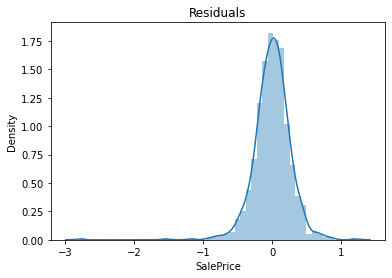

In [8663]:
res = y_train - y_train_pred
plt.figure()
sns.distplot(res)
plt.title("Residuals")
plt.show()

In [8664]:
y_test_pred = ridge.predict(X_test) 

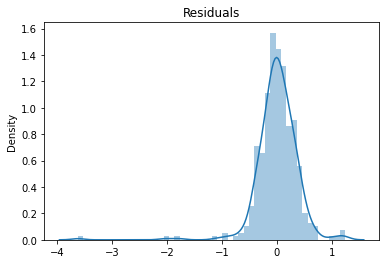

In [8665]:
res = y_test - y_test_pred
plt.figure()
plt.title("Residuals")
sns.distplot(res.to_frame())
plt.show()

In [8666]:
dist_check = pd.DataFrame(res)
dist_check["pred"] = y_test_pred
dist_check.columns=["err","pred"]

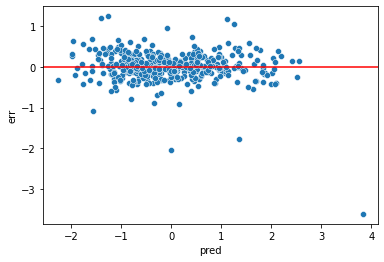

In [8667]:
sns.scatterplot(data=dist_check,x="pred",y="err")
plt.axhline(y=0.0, color='r', linestyle='-')

In [8668]:
r2_test= r2_score(y_true=y_test,y_pred=y_test_pred)
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
rss_test = np.sum((y_test-y_test_pred)**2)
rss_train =  np.sum((y_train-y_train_pred)**2)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)

print("R2 Test: ",r2_test)
print("R2 Train: ",r2_train)
print("MSE Train: ",mse_train)
print("MSE Test: ",mse_test)
print("RSS Train: ",rss_train)
print("RSS Test: ",rss_test)

error_metrics["Ridge"] = np.array([r2_test,r2_train,mse_train,mse_test,rss_train,rss_test])
error_metrics

R2 Test:  0.8545658278272519
R2 Train:  0.9289058063175236
MSE Train:  0.07109419368247637
MSE Test:  0.14096927650260924
RSS Train:  67.25510722362264
RSS Test:  57.23352626005935


Ridge Lasso         RFE
R2 Test     0.854566   NaN    0.750365
R2 Train    0.928906   NaN    0.801440
MSE Train   0.071094   NaN    0.198560
MSE Test    0.140969   NaN    0.241971
RSS Train  67.255107   NaN  187.838015
RSS Test   57.233526   NaN   98.240392

## Lasso Regression

In [8669]:
params={'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4 , 0.5, 0.6, 0.7, 0.8, 0.9, 1,2,3,4,5,6,7,8,9,10,
                20,50,100,500,700,900,1000,1500,2000]}

lasso=Lasso()

In [8670]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model_cv = GridSearchCV(estimator = lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=kf,
                       return_train_score=True,
                       verbose=1)

In [8671]:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 700, 900,
                                   1000, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [8672]:
model_cv.best_params_


{'alpha': 0.001}

In [8673]:
alpha=model_cv.best_params_['alpha']
lasso=Lasso(alpha=alpha)

In [8674]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [8675]:
lasso.coef_

array([-8.35287884e-02, -2.83680249e-02,  5.27136386e-02,  1.93058946e-01,
        1.21838928e-01,  1.30873411e-01,  2.99540290e-03, -0.00000000e+00,
        9.67952557e-03,  4.85673329e-03, -0.00000000e+00,  2.16218663e-02,
        0.00000000e+00, -1.57580116e-02,  3.34249826e-01,  4.91509165e-02,
       -0.00000000e+00,  3.30191641e-02,  9.92875191e-03,  7.75379564e-03,
       -2.76424654e-02,  0.00000000e+00,  1.27154969e-01,  4.71887821e-02,
        3.02833718e-02,  1.94741727e-02,  6.72883643e-03,  2.44583335e-02,
        3.79094111e-03, -0.00000000e+00, -6.36437881e-03, -8.50945508e-03,
        1.81550420e-01, -0.00000000e+00,  1.79075859e-01, -0.00000000e+00,
        0.00000000e+00, -1.78348688e-02,  4.65272286e-02,  0.00000000e+00,
       -3.81858581e-01,  2.81647304e-04,  1.59761068e-02,  0.00000000e+00,
        4.98595839e-02,  1.15908596e-01, -5.86454072e-02,  0.00000000e+00,
       -1.66085518e-02,  4.19933398e-02, -1.53094031e-01, -0.00000000e+00,
        0.00000000e+00,  

In [8676]:
y_train_pred = lasso.predict(X_train)

### Residual Analysis

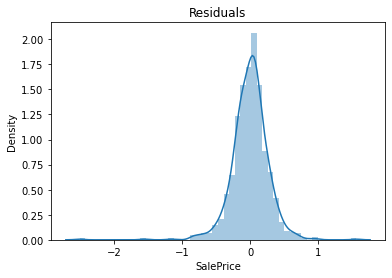

In [8677]:
res = y_train - y_train_pred
plt.figure()
sns.distplot(res)
plt.title("Residuals")
plt.show()

In [8678]:
y_test_pred = ridge.predict(X_test) 

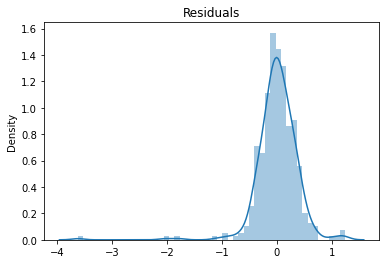

In [8679]:
res = y_test - y_test_pred
plt.figure()
plt.title("Residuals")
sns.distplot(res.to_frame())
plt.show()

In [8680]:
dist_check = pd.DataFrame(res)
dist_check["pred"] = y_test_pred
dist_check.columns=["err","pred"]

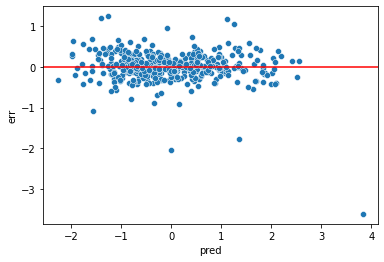

In [8681]:
sns.scatterplot(data=dist_check,x="pred",y="err")
plt.axhline(y=0.0, color='r', linestyle='-')

In [8682]:
r2_test= r2_score(y_true=y_test,y_pred=y_test_pred)
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
rss_test = np.sum((y_test-y_test_pred)**2)
rss_train =  np.sum((y_train-y_train_pred)**2)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)

print("R2 Test: ",r2_test)
print("R2 Train: ",r2_train)
print("MSE Train: ",mse_train)
print("MSE Test: ",mse_test)
print("RSS Train: ",rss_train)
print("RSS Test: ",rss_test)

error_metrics["Lasso"] = np.array([r2_test,r2_train,mse_train,mse_test,rss_train,rss_test])
error_metrics

R2 Test:  0.8545658278272519
R2 Train:  0.9288366565200432
MSE Train:  0.07116334347995676
MSE Test:  0.14096927650260924
RSS Train:  67.3205229320391
RSS Test:  57.23352626005935


Ridge      Lasso         RFE
R2 Test     0.854566   0.854566    0.750365
R2 Train    0.928906   0.928837    0.801440
MSE Train   0.071094   0.071163    0.198560
MSE Test    0.140969   0.140969    0.241971
RSS Train  67.255107  67.320523  187.838015
RSS Test   57.233526  57.233526   98.240392

In [8683]:
metrics['coeff_lasso']=lasso.coef_

metrics_gl = metrics[:]

In [8684]:
metrics_gl["coeff_lasso_abs"] = metrics_gl.coeff_lasso.apply(lambda x: abs(x))

In [8685]:
metrics_gl = metrics_gl.sort_values(by=['coeff_lasso_abs'], ascending=False)
metrics_gl.reset_index(inplace=True)
metrics_gl[metrics_gl["coeff_lasso_abs"]>0.000000].head(10)

index                   col  coeff_ridge  coeff_lasso  coeff_lasso_abs
0    225             PoolQC_Gd    -0.224594    -1.647573         1.647573
1     56  Neighborhood_Crawfor     0.287990     0.385896         0.385896
2     40          LotShape_IR3    -0.251544    -0.381859         0.381859
3     14             GrLivArea     0.309804     0.334250         0.334250
4    244  SaleCondition_Alloca     0.184222     0.292988         0.292988
5     72  Neighborhood_StoneBr     0.209707     0.279251         0.279251
6     60  Neighborhood_MeadowV    -0.221007    -0.278747         0.278747
7    166     BsmtExposure_None    -0.075234    -0.257580         0.257580
8     66  Neighborhood_NridgHt     0.193509     0.234724         0.234724
9    114   Exterior1st_BrkFace     0.181966     0.214699         0.214699

In [8686]:
error_metrics 

Ridge      Lasso         RFE
R2 Test     0.854566   0.854566    0.750365
R2 Train    0.928906   0.928837    0.801440
MSE Train   0.071094   0.071163    0.198560
MSE Test    0.140969   0.140969    0.241971
RSS Train  67.255107  67.320523  187.838015
RSS Test   57.233526  57.233526   98.240392

## Lambda Optimal
### Ridge: 7
### Lasso: 0.001

## Ridge is the selected model 
### Ridge and Lasso have given same metrics for error but Lasso still has coefficients far greater than 0 and but Ridge coefficients lays between (0,1)

### The difference between training and test is considerable and requires more data for better results.
Observation: A split of 80/20 reduced the difference between train and test accruracies by 4%